<a href="https://colab.research.google.com/github/wanxing2/Wine-Clustering/blob/main/Stat430_Final_Project_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STAT 430 Final Project: Wine Data Set Clustering**
Jing Huang

Wanxing Dai

We use the given dataset Wine data set from https://archive.ics.uci.edu/ml/datasets/Wine. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. This dataset has
pre-assigned class labels, which represent the three wine cultivars.

In [9]:
!pip install pyclustertend

In [47]:
import numpy as np
import pandas as pd
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
 

from gensim import corpora, models, similarities, matutils
import sklearn
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

from pyclustertend import hopkins

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
# import data
# --------------------------------------------
%cd /content/drive/My Drive/STAT430Final Project/
df = pd.read_csv('wine.csv')
print("shape: ", df.shape)
df.head()

/content/drive/My Drive/STAT430Final Project
shape:  (178, 14)


,Wine Class,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Data cleaning

In [4]:
# check missing values
# --------------------------------------------
print("Count of missing values in each column:")
df.isna().sum()

Count of missing values in each column:


Wine Class                         0
Alcohol Content                    0
Malic Acid                         0
Ash                                0
Alcalinity of Ash                  0
Magnesium                          0
Total Phenols                      0
Flavanoids                         0
Nonflavanoid Phenols               0
Proanthocyanins                    0
Color Intensity                    0
Hue                                0
OD280 or OD315 of diluted wines    0
Proline                            0
dtype: int64

In [55]:
# check quantitative data
# --------------------------------------------
df.describe()

,Wine Class,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
df.columns

Index(['Wine Class', 'Alcohol Content', 'Malic Acid', 'Ash',
       'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids',
       'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue',
       'OD280 or OD315 of diluted wines', 'Proline'],
      dtype='object')

## **Dataset Suitability Pre-Analysis**




Clusterability Check 1: Hopkins statistics

In [11]:
X = df.drop(['Wine Class'], axis=1)
ss = StandardScaler()
sX = ss.fit_transform(X)
sX=pd.DataFrame(sX, columns=X.columns)
sX.head()


,Alcohol Content,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 or OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [12]:
n=len(X)
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.4431821953024748, 0.25489859510809415, 0.2667237144013338, 0.3552696268395819, 0.2682149414225863]


The data is clutserable.

Clusterability Check 2: t-SNE Plots

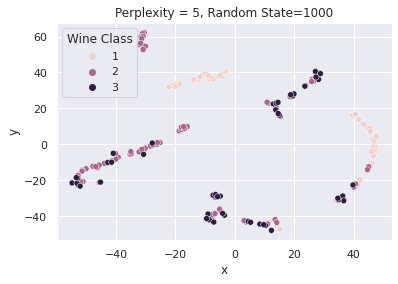

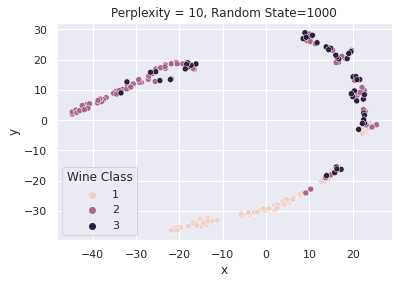

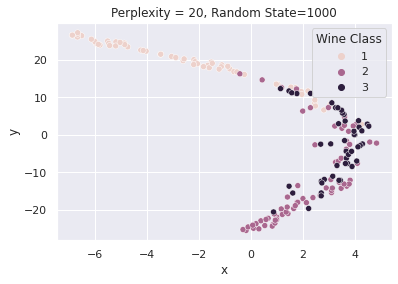

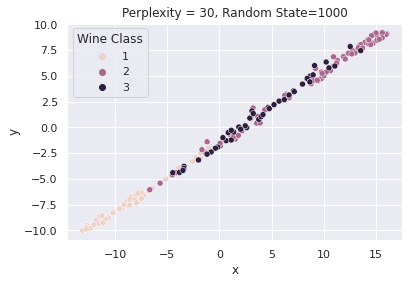

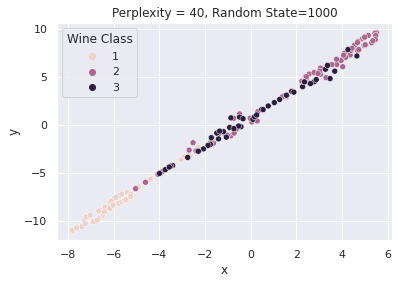

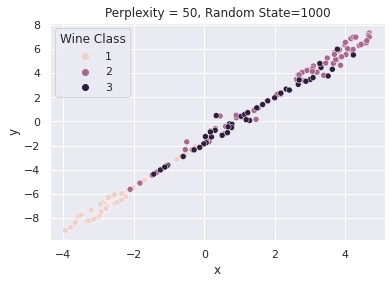

In [25]:
for perp in [5, 10, 20, 30, 40, 50]:
    # Perform the TSNE non-linear dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=perp, random_state=1000)
    data_tsne = tsne.fit_transform(X)

    #concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the same dataset.
    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
    dff = pd.concat([df_tsne, df], axis=1)

    # Plot the projected (x,y) coordinates
    sns.scatterplot(x='x', y='y', hue = 'Wine Class', data=dff)
    plt.title('Perplexity = %s, Random State=1000' %perp)
    plt.show()

## **Dataset Research**

The evolution of direct, data and digital marketing, Richard Webber, Journal of Direct, Data and Digital Marketing Practice (2013) 14, 291â€“309.

Clustering Experiments on Big Transaction Data for Market Segmentation,
Ashishkumar Singh, Grace Rumantir, Annie South, Blair Bethwaite, Proceedings of the 2014 International Conference on Big Data Science and Computing.

A decision-making framework for precision marketing, Zhen You, Yain-Whar Si, Defu Zhang, XiangXiang Zeng, Stephen C.H. Leung c, Tao Li, Expert Systems with Applications, 42 (2015) 3357â€“336

**Motivation:** After picking a suitable dataset (or deciding to use the one I gave you) and citing at least three resources, describe the motivation for why someone would want to conduct an unsupervised learning analysis on this dataset or a dataset of this type. These resources could be news articles, scholarly publications, additional data, etc. Give a brief explanation of the significance of each resource. Your resources should be cited in a standard citation format (ie. MLA, APA, Chicago, etc).

**Dataset Information:** Also be sure to look up and discuss how the dataset was collected and any type of preprocessing that was conducted on the dataset that you will be using.


**Source:**

Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management,

**References:**

https://archive.ics.uci.edu/ml/datasets/online+retail


**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

## **Preliminary Exploratory Data Analysis**

Before using any unsupervised learning algorithms, learn more about your dataset using basic
exploratory data analysis.
1. For your numerical attributes, calculate basic summary statistics about each attribute.
2. For any categorical attributes (including the pre-assigned class labels, if your dataset has
any) count up the number of observations of each type.
3. Determine if there exist are any strong pairwise relationships between at least one pair
of attributes in your dataset and visualize these relationships.
4. From your analyses conducted here, should you scale your dataset? Explain why or why
not. If you choose to scale, then do so.

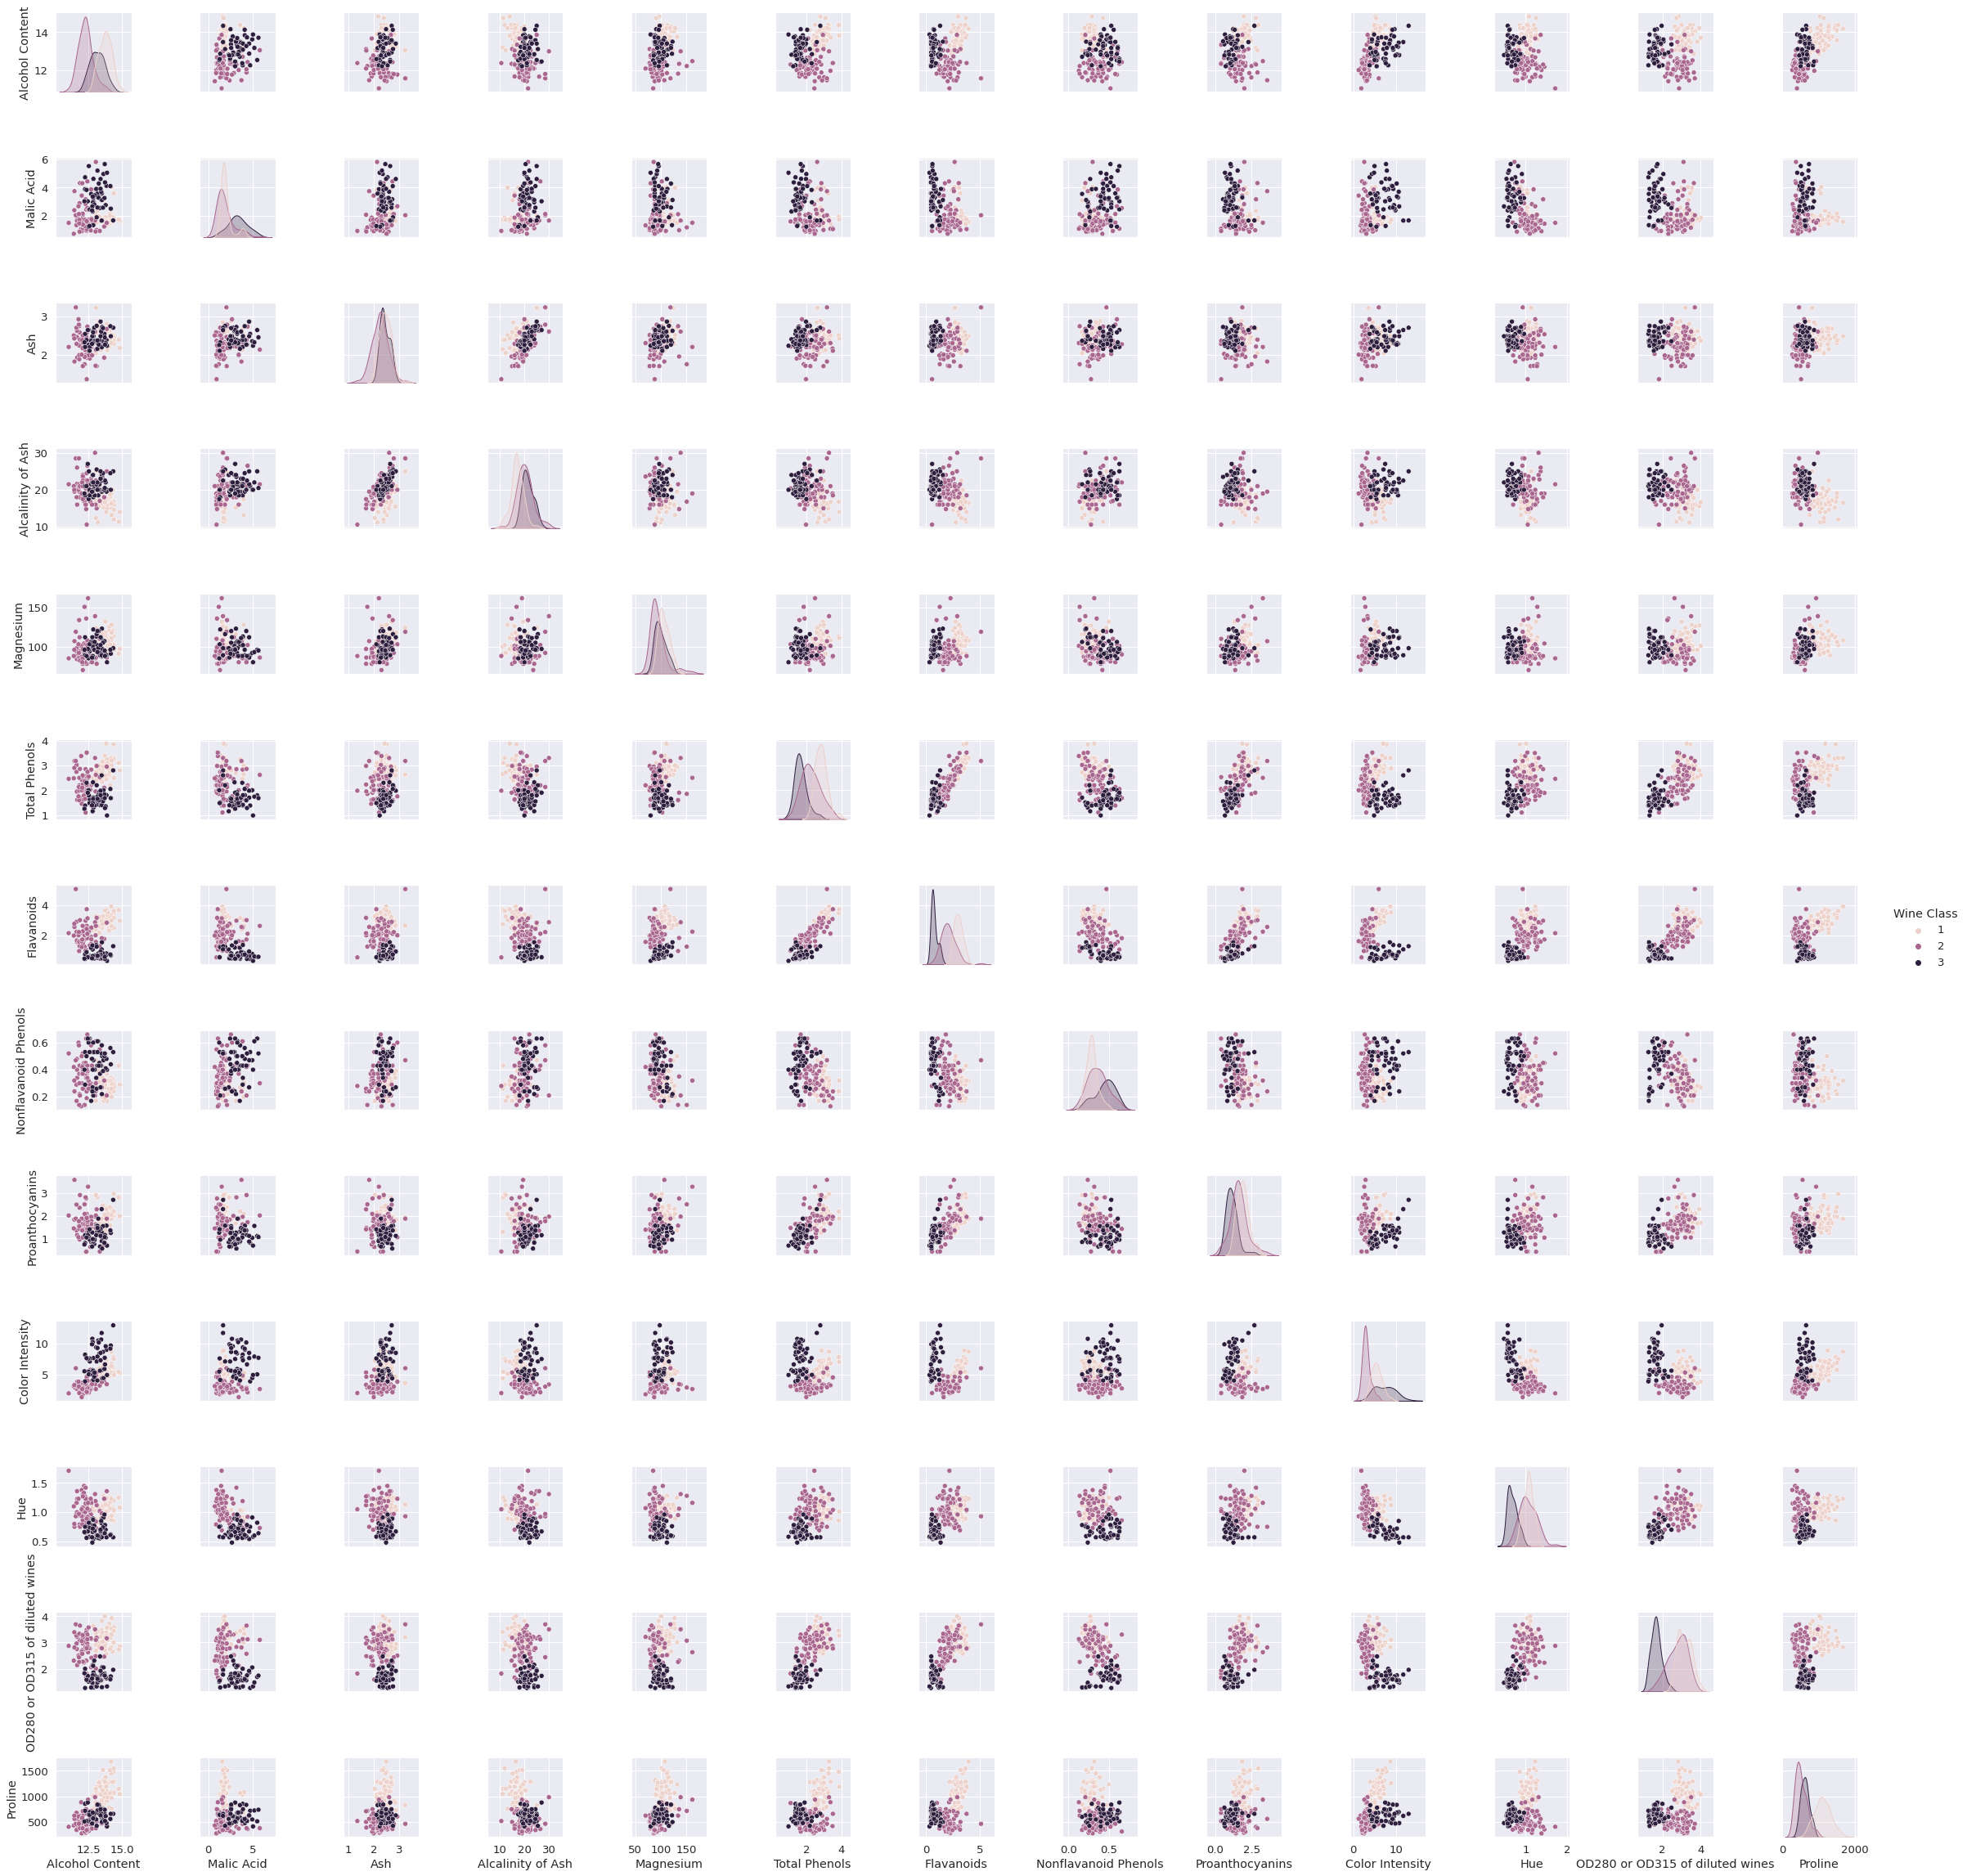

In [17]:
# Visualize the relationships between some of the attributes.
sns.set()

with sns.plotting_context("notebook", font_scale=1.2):
    sns.pairplot(df,
                 vars=['Alcohol Content', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280 or OD315 of diluted wines', 'Proline'],
                 hue="Wine Class")

plt.show()

## **Pre-Analysis Questions**

Use the methods that we have learned in this class to answer the following questions. If the answer to some of these questions is not clear-cut, explain why.
1. Is the dataset clusterable? (The answer to this should be yes). Explain why.
2. If so, describe the underlying clustering structure of the data.
a. Approximately how many underlying clusters does the data have? b. What are the shapes of the underlying clusters?
c. Are the clusters balanced in size?
d. Do any of the clusters that you identified overlap with each other?

## **Algorithm Selection Motivation**

Next, using your background research, your findings from your preliminary EDA, and/or your findings from your pre-analysis questions explain why you chose these two (or more) unsupervised learning algorithms to use on your dataset.

## Clustering Algorithm 1: K-Means Clustering

Present and discuss the results of these algorithms to the reader of your report in an insightful way that relates back to your original motivation for performing the unsupervised learning analysis.
For instance:
* If your clustering is a hard assignment, you 
can color-code your t-SNE plot with the cluster labels.
* If your clustering algorithm is a hierarchical clustering algorithm, give the dendrogram and explain the nested relationships.
* If your clustering is a fuzzy clustering (or 
has cluster membership scores), you can plot K (# of clusters) t-sne plots, and color code each plot by the cluster membership score for the kth clusters.

Input Parameters
For any algorithms that require input parameters (most do), make sure you explain (and show the work for) why you selected these particular parameters. If you choose to use multiple sets of input parameters, make sure you discuss and show how the results of your algorithm changed when you tried these different input parameters.

In [42]:
cluster_number_list = range(1,12)
avg_inertia_list = []
for k in cluster_number_list:
  sub_inertia_list=[]
  for i in range(0,3):
    kmeans=KMeans(n_clusters=k).fit(X)
    sub_inertia_list.append(kmeans.inertia_)
  avg_inertia_list.append(np.average(sub_inertia_list))

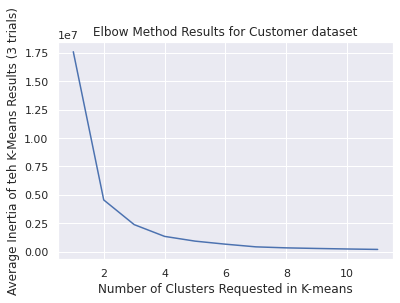

In [43]:
plt.plot(cluster_number_list, avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of teh K-Means Results (3 trials)')
plt.title('Elbow Method Results for Customer dataset')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6568536504294317
For n_clusters = 3 The average silhouette_score is : 0.571138193786884
For n_clusters = 4 The average silhouette_score is : 0.562091530895106


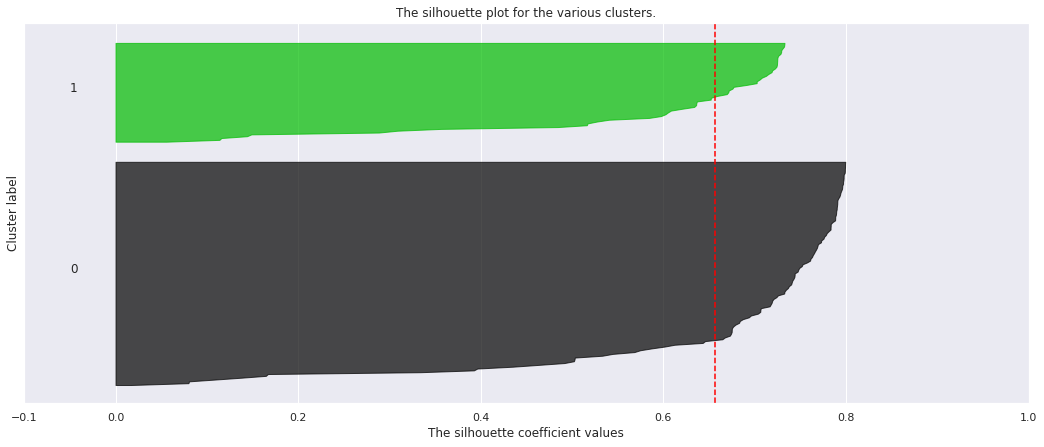

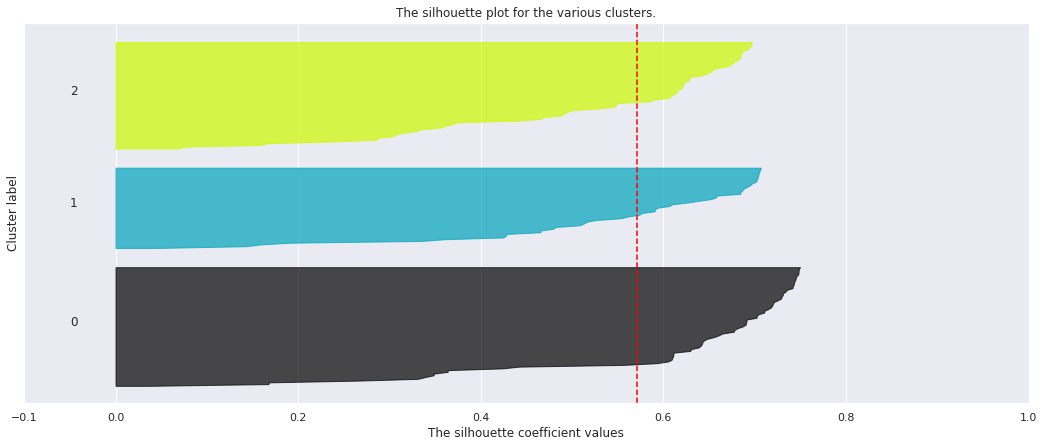

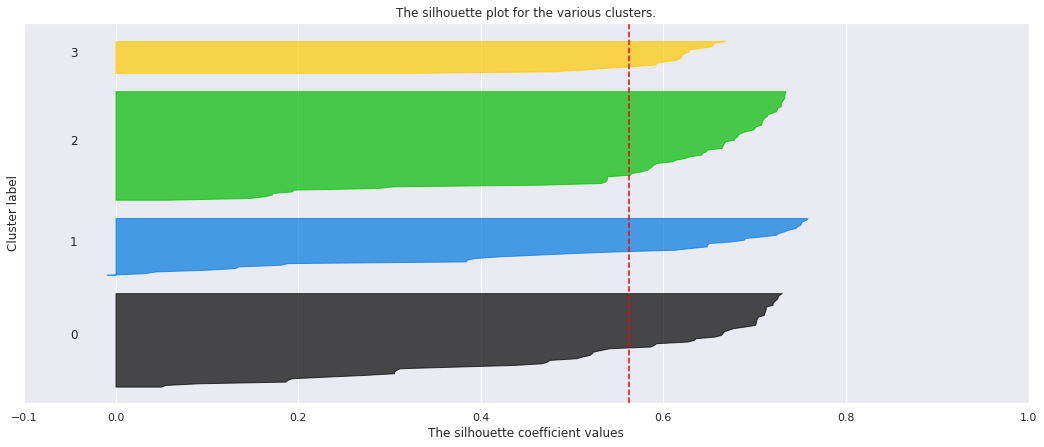

In [44]:
cluster_num_list=range(2,5)
silhouette_avg_list=[]

for n_clusters in cluster_num_list:
    
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    #CLUSTER THE DATA
    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = kmeans.labels_
    
    #FINDS THE AVERAGE SILHOUETTE SCORE
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

In [45]:
kmeans=KMeans(n_clusters=3).fit(X)
df['predicted_cluster']=kmeans.labels_
adjusted_rand_score(df['predicted_cluster'], df['Wine Class'])

0.37111371823084754

In [46]:
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()
centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids), columns=data.columns)
centroids_data.head()

NameError: ignored

1. Separation and Cohesion: For the clustering returned by your clustering algorithms assess and discuss the cohesion of each of the clusters. Are there are any objects that have poor cohesion with their assigned cluster?


a. Note: If you used a hierarchical clustering algorithm, select (at least one) of the clusterings returned by the algorithm. If you used a clustering algorithm with a cluster membership score, create a hard partition by assigning each object to the cluster that it most belongs to.


2. Cluster Attributes: For each of the clusters in each of your clusterings, what attributes (and attribute relationships) standout for objects assigned to this dataset? (There are many ways that we learned how to do this in this class, you can pick one).


3. If your dataset had pre-assigned class labels [Supervised Learning Evaluation]
For each of the two (or more) clusterings returned by your clustering algorithms, do the following.

i. Calculate the following and interpret the result.

1. Adjusted RAND Index between the clustering and the class labels. 

2. Homogeneity score between the clustering and the class labels. 

3. Completeness score between the clustering and the class labels.


ii. Color code the points in your t-sne plot by cluster labels and code the “style” of the marker with your class labels. Then interpret this plot. Did what you observe in this plot corroborate what you calculated in your adjusted rand index, the homogeneity score, and the completeness score?
4. If your dataset DID NOT have pre-assigned class labels [Cluster Distance] 
  a. Which clusters are closer to eachother than others?

NameError: ignored

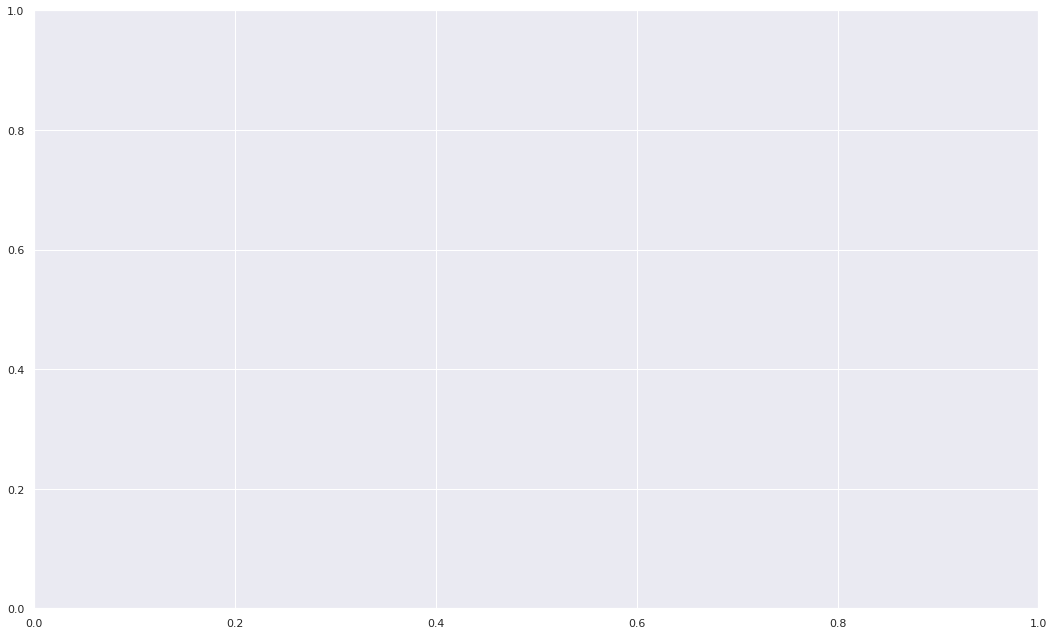

In [52]:
fig, ax = plt.subplots(figsize=(18, 11))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    hue='prediction',
                    size='area_mean',
                    style='diagnosis',
                    sizes=(30, 400),
                    palette=sns.color_palette("husl", 2),
                    data=kmdff,
                    ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

In [ ]:
#What do these clusters look like on the t-sne plot, can we determine any additional pattern to these clusters?
for n in (2,3,4,5,6):
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='average')
    Y_pred = ag.fit_predict(X)

    df_pred = pd.Series(Y_pred, name='Cluster', index=df.index)


    tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
    data_tsne = tsne.fit_transform(X)
    #concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the same dataset.
    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
    dff = pd.concat([df_tsne, df], axis=1)

    pdff = pd.concat([dff, df_pred], axis=1)

    # Show the results of the clustering
    sns.scatterplot(x='x',y='y', hue='Cluster', palette=sns.color_palette("husl", n),data=pdff)
    plt.title('t-SNE Plot Color Coded by Complete Linkage Hierarchical Clustering Cluster')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

## Clustering Algorithm 2: Hierarchical Clustering 

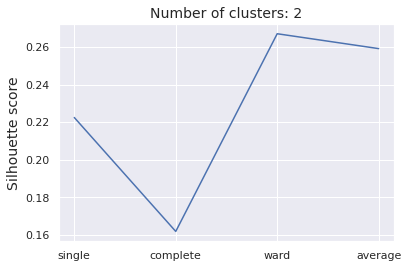

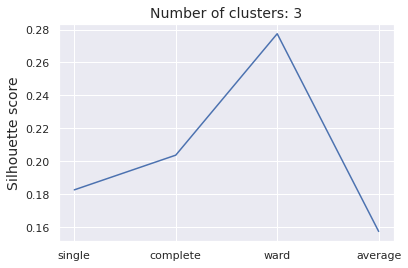

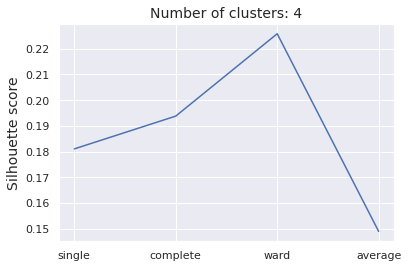

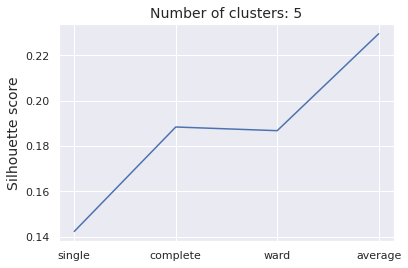

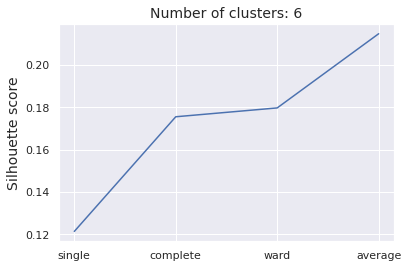

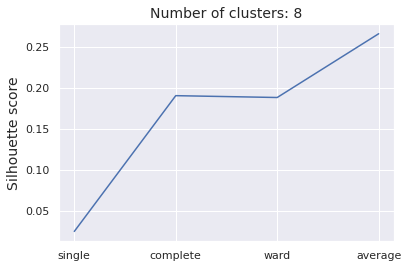

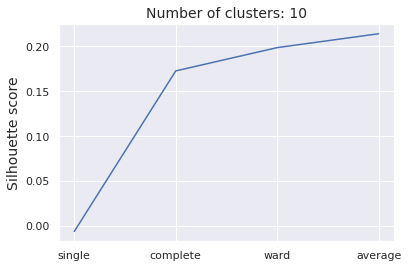

In [53]:
nb_clusters = [2, 3, 4, 5, 6, 8, 10]
linkages = ['single', 'complete', 'ward', 'average']

silhouette_scores = np.zeros(shape=(len(linkages), len(nb_clusters)))

for i, l in enumerate(linkages):
    for j, nbc in enumerate(nb_clusters):
        ag = AgglomerativeClustering(n_clusters=nbc, affinity='euclidean', linkage=l)
        Y_pred = ag.fit_predict(sX)
        sls = silhouette_score(sX, Y_pred, random_state=1000)
        silhouette_scores[i, j] = sls

for i in range(len(nb_clusters)):
    plt.plot(silhouette_scores[:, i])
    plt.ylabel('Silhouette score', fontsize=14)
    plt.title('Number of clusters: {}'.format(nb_clusters[i]), fontsize=14)
    plt.xticks(np.arange(len(linkages)), linkages)
    plt.show()



In [ ]:
# Show the truncated dendrogram for a complete linkage
dm = pdist(sX, metric='euclidean')
Z = linkage(dm, method='average')

fig, ax = plt.subplots(figsize=(25, 20))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=80, no_labels=True, ax=ax)

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (80 leaves)', fontsize=18)

plt.show()

1. Separation and Cohesion: For the clustering returned by your clustering algorithms assess and discuss the cohesion of each of the clusters. Are there are any objects that have poor cohesion with their assigned cluster?
a. Note: If you used a hierarchical clustering algorithm, select (at least one) of the clusterings returned by the algorithm. If you used a clustering algorithm with a cluster membership score, create a hard partition by assigning each object to the cluster that it most belongs to.
2. Cluster Attributes: For each of the clusters in each of your clusterings, what attributes (and attribute relationships) standout for objects assigned to this dataset? (There are many ways that we learned how to do this in this class, you can pick one).
3. If your dataset had pre-assigned class labels [Supervised Learning Evaluation]
For each of the two (or more) clusterings returned by your clustering algorithms, do the following.
i. Calculate the following and interpret the result.
1. Adjusted RAND Index between the clustering and the class labels. 2. Homogeneity score between the clustering and the class labels. 3. Completeness score between the clustering and the class labels.
ii. Color code the points in your t-sne plot by cluster labels and code the “style” of the marker with your class labels. Then interpret this plot. Did what you observe in this plot corroborate what you calculated in your adjusted rand index, the homogeneity score, and the completeness score?
4. If your dataset DID NOT have pre-assigned class labels [Cluster Distance] a. Which clusters are closer to eachother than others?

## Analysis Summary

1. Algorithm Comparison Summary: Given your research motivation you discussed for this
dataset, are the results and performance from just one of these algorithms categorically
better than all the others? Explain why or why not. (Show code and visualizations to
help explain why).
2. Insights Summary: Summarize the insights you found with all of your analyses and
relate how these insights might be useful towards your research motivation.